In [170]:
from __future__ import division, print_function, unicode_literals
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
rc('text', usetex = True)
rc('font', family='serif')

In [171]:
df = pd.read_csv('cars.csv', sep=',')
df.rename(index=str, columns={'Unnamed: 0' : 'ID'}, inplace=True)
df.head()

,ID,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [172]:
X, y = df.speed, df.dist

In [173]:
def linear_regression(X, y, n):
    data_X = np.c_[X]
    X = np.c_[np.ones((len(y), 1)), X]
    for i in range (2, n + 1):
        X = np.c_[X, data_X ** i]
    opt_coeffs = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).reshape(-1, 1)
    y_predict = X.dot(opt_coeffs)
    return y_predict, X, opt_coeffs

For degree 1 we have: y = -17.579 x^0 + 3.932 x^1
For degree 2 we have: y = 2.470 x^0 + 0.913 x^1 + 0.100 x^2
For degree 3 we have: y = -19.505 x^0 + 6.801 x^1 + -0.350 x^2 + 0.010 x^3
For degree 4 we have: y = 45.845 x^0 + -18.962 x^1 + 2.892 x^2 + -0.152 x^3 + 0.003 x^4


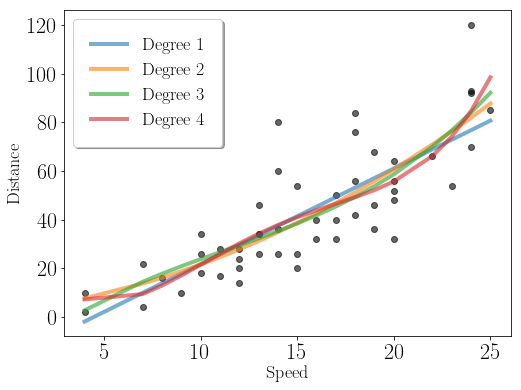

In [175]:
ax = plt.figure(figsize=(8, 6))
plt.plot(X, y, 'k.', label='_nolegend_', markersize=12, alpha=0.6)
for poly in range (1, 5):
    y_pred, transformed_X, coeff = linear_regression(X, y, poly)
    plt.plot(X, y_pred, '-',label=("Degree %d" % poly), linewidth=4, alpha=0.6)
    equation = 'y = '
    for i in range (0, poly + 1):
        if i != 0: equation += ' + '
        equation += ('%.3f x^%d' % (coeff[i], i))
    print('For degree %d we have:' % (poly), equation)
plt.legend(fontsize=18, fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.xlabel('Speed')
dump = plt.ylabel('Distance')